# Analysis of the stability of an LTI dynamic system: a mass-spring-damper model

This exercise investigates the stability of a linear time-invariant (LTI) system using a mass-spring-damper model governed by a second-order differential equation, solved both analytically and numerically. The system’s stability is analysed by examining the eigenvalues of the state-space representation and solving the equations of motion for different damping scenarios. The mass-spring-damper system is a classical mechanical model used to study oscillatory behaviour and damping effects, with the damping coefficient playing a critical role in determining whether the system exhibits oscillations or returns to equilibrium without oscillating. By exploring different damping conditions—underdamped, critically damped, and overdamped—the exercise provides insights into how the system's response changes and offers valuable information for designing stable systems in engineering applications.


## Problem formulation

To analyse the behaviour of a mass-spring-damper system, a mathematical model is developed based on fundamental principles of dynamics. This formulation captures the system's response to external forces and provides a basis for assessing its stability and transient behaviour.

### Governing equations

The dynamics of the mass-spring-damper system are governed by the second-order differential equation:

$$
m \ddot{x}(t) + c \dot{x}(t) + kx(t) = u(t),
$$

where:

-   $m$ is the mass (kg),
-   $c$ is the damping coefficient (Ns/m),
-   $k$ is the spring constant (N/m),
-   $x(t)$ is the displacement at time $t$ (m),
-   $u(t)$ is the external input force at time $t$ (N).

This second-order differential equation can be rewritten as a first-order system:

$$
\dot{x}(t) = v(t)
$$

$$
\dot{v}(t) = -\frac{k}{m}x(t) - \frac{c}{m}v(t) + \frac{1}{m}u(t)
$$

where:

-   $x(t)$ is the position state,
-   $v(t)$ is the velocity state.

The state-space representation is then given by:

$$
\begin{align*}
    \dot{x}(t) &= \mathbf{A} x(t) + \mathbf{B} u(t) \\
    y(t) &= \mathbf{C} x(t) + \mathbf{D} u(t)
\end{align*}
$$

where:

$$
\mathbf{A} =
\begin{bmatrix}
0 & 1 \\
-\frac{k}{m} & -\frac{c}{m}
\end{bmatrix}, \quad
\mathbf{B} = \begin{bmatrix} 0 \\ \frac{1}{m} \end{bmatrix}, \quad
\mathbf{C} = \begin{bmatrix} 1 & 0 \end{bmatrix}, \quad
\mathbf{D} = \begin{bmatrix} 0 \end{bmatrix}.
$$

### System stability

The stability of the mass-spring-damper system is determined by analysing the eigenvalues of the state matrix $\mathbf{A}$ in the state-space representation. These eigenvalues provide insight into the system's dynamic behaviour and damping characteristics:

1. Stability conditions:

    - The system is _stable_ if all eigenvalues of $\mathbf{A}$ have negative real parts.
    - The system is _unstable_ if any eigenvalue of $\mathbf{A}$ has a positive real part.

2. Damping classification:
    - Underdamped system: The eigenvalues are complex conjugates with negative real parts, indicating oscillatory behaviour with an exponential decay.
    - Critically damped system: The eigenvalues are real, equal, and negative, representing the fastest return to equilibrium without oscillation.
    - Overdamped system: The eigenvalues are real, distinct, and negative, indicating a slower, non-oscillatory return to equilibrium.

### Time evolution of the system

The time evolution of the system is derived by solving the state-space equations under specific initial conditions and external inputs. The response of the system provides valuable insights into its dynamic behaviour:

1. Response to a unit step input ($u(t) = 1$):

    - The displacement $x(t)$ and velocity $v(t)$ are computed over a specified time interval to observe how the system reacts to a constant external force.

2. Numerical simulation:

    - The equations of motion are solved numerically using integration techniques to capture the transient and steady-state responses.
    - Time-domain simulations allow visualisation of the system’s behaviour under various damping scenarios.

3. Analysis of results:
    - For underdamped systems, oscillatory responses with exponential decay are expected.
    - For critically damped systems, the response is expected to return to equilibrium as quickly as possible without oscillation.
    - For overdamped systems, the response is slower, with no oscillatory behaviour.


## Implementation

The implementation section demonstrates how the mathematical principles outlined in the problem formulation are translated into practical code. Each step corresponds to the key operations defined in the problem formulation, including system parameterisation, stability analysis, and time-domain simulation.


### Parameter definition and initialisation

The first step is to define the system parameters, initial conditions, and the time span for the simulation. This allows for testing the system under various damping scenarios (critically damped, overdamped, and underdamped).

#### Definition of parameters and initial conditions

The parameter set defines various configurations for the mass $m$, damping coefficient $c$, and spring constant $k$. These configurations correspond to different damping scenarios (critically damped, overdamped, and underdamped) used to test the system's behavior.


In [1]:
# Import libraries
import numpy as np
from scipy.integrate import solve_ivp
from scipy.linalg import eigvals
import matplotlib.pyplot as plt

# Parameter sets for different damping scenarios
parameter_sets = [
    (1.0, 0.1, 10.0),  # Low mass, low damping, low stiffness
    (3.0, 1.0, 20.0),  # Medium mass, moderate damping, medium stiffness
    (3.0, 2.0, 50.0),  # Medium mass, high damping, high stiffness
    (1.0, 0.1, 20.0),  # Low mass, low damping, medium stiffness
]

# Initial conditions (displacement and velocity)
x0 = [0.1, 0.0]  # Initial displacement and velocity

# Time points for numerical simulation
t_span = (0, 10)  # Start and end times
t_eval = np.linspace(0, 10, 1000)  # Evaluation points

#### Definition of state-space matrices

The matrices $\mathbf{A}$, $\mathbf{B}$, $\mathbf{C}$, and $\mathbf{D}$ are derived based on the defined parameters (mass, damping coefficient, and spring constant).


In [2]:
# Function to generate state-space matrices
def state_space_matrices(m, c, k):
    """
    Generate state-space matrices for a 2nd order system.

    Parameters
    ----------
    m : float
        Mass of the system.
    c : float
        Damping coefficient.
    k : float
        Stiffness coefficient.

    Returns
    -------
    A : numpy.ndarray
        State matrix.
    B : numpy.ndarray
        Input matrix.
    C : numpy.ndarray
        Output matrix.
    D : numpy.ndarray
        Feedthrough matrix.
    """
    A = np.array([[0, 1], [-k / m, -c / m]])
    B = np.array([[0], [1 / m]])
    C = np.array([[1, 0]])
    D = np.array([[0]])
    return A, B, C, D

## Stability analysis and time-domain simulation


### Stability analysis

The eigenvalues of the state matrix $\mathbf{A}$ are computed to assess system stability. The real parts of the eigenvalues determine whether the system is stable, and the eigenvalues' nature (real or complex) classifies the damping behaviour.


In [3]:
# Function to compute eigenvalues and check stability
def check_stability(A):
    """
    Check the stability of a linear time-invariant system.

    Parameters
    ----------
    A : numpy.ndarray
        State matrix of the system.

    Returns
    -------
    eigenvalues : numpy.ndarray
        Eigenvalues of the system.
    stable : bool
        True if the system is stable, False otherwise.
    """
    eigenvalues = eigvals(A)
    stable = all(e.real < 0 for e in eigenvalues)
    return eigenvalues, stable

#### Controllability check

A system is controllable if it is possible to move the system from any initial state to any desired final state within a finite time using appropriate control inputs. For a linear time-invariant (LTI) system represented by the matrices $\mathbf{A}$ and $\mathbf{B}$, the controllability matrix $\mathbf{C}$ is defined as:

$$
\mathbf{C} = \begin{bmatrix} \mathbf{B} & \mathbf{A}\mathbf{B} & \mathbf{A}^2\mathbf{B} & \cdots & \mathbf{A}^{n-1}\mathbf{B} \end{bmatrix}
$$

The system is controllable if the controllability matrix $\mathbf{C}$ has full rank, i.e., the rank of $\mathbf{C}$ is equal to the number of states $n$.


In [4]:
def is_controllable(A, B):
    """
    Check the controllability of a linear time-invariant system.

    Parameters
    ----------
    A : numpy.ndarray
        State matrix of the system.
    B : numpy.ndarray
        Input matrix of the system.

    Returns
    -------
    controllable : bool
        True if the system is controllable, False otherwise.
    """
    # Number of states
    n = A.shape[0]
    # Construct the controllability matrix
    controllability_matrix = np.hstack(
        [np.linalg.matrix_power(A, i) @ B for i in range(n)]
    )
    # Compute the rank of the controllability matrix
    rank = np.linalg.matrix_rank(controllability_matrix)
    # Check if the rank is equal to the number of states
    return rank == n

### Time-domain simulation

The time evolution of the system is simulated by solving the state-space equations numerically. A unit step input is used for the external force $u(t)$.


In [5]:
# Step input function
def step_input(t):
    """
    Step input function for the system.

    Parameters
    ----------
    t : float
        Time.

    Returns
    -------
    float
        Step input value at time t.
    """
    return 1.0  # Constant unit step input


# Function to simulate the system
def simulate_system(A, B, u, t_span, x0, t_eval):
    """
    Simulate a linear time-invariant system.

    Parameters
    ----------
    A : numpy.ndarray
        State matrix of the system.
    B : numpy.ndarray
        Input matrix of the system.
    u : function
        Input function.
    t_span : tuple
        Start and end times.
    x0 : numpy.ndarray
        Initial state vector.
    t_eval : numpy.ndarray
        Time points for evaluation.

    Returns
    -------
    t : numpy.ndarray
        Time points.
    x : numpy.ndarray
        State trajectory.
    """

    def state_eq(t, x):
        """
        State-space equation of the system.

        Parameters
        ----------
        t : float
            Time.
        x : numpy.ndarray
            State vector.

        Returns
        -------
        numpy.ndarray
            Derivative of the state vector.
        """
        return A @ x + B.flatten() * u(t)  # State-space equation

    solution = solve_ivp(state_eq, t_span, x0, t_eval=t_eval)
    return solution.t, solution.y

## Results

For each parameter set, the stability analysis includes computing the eigenvalues of the state-space matrix $\mathbf{A}$, simulating the system’s time-domain response via an ODE solver, and visualising the results through plots of the time-domain responses and eigenvalue locations.


In [6]:
# Combined plot function for time evolution and eigenvalues
def plot_results(t, response, eigenvalues, title):
    """
    Plot the time-domain response and eigenvalues of a system.

    Parameters
    ----------
    t : numpy.ndarray
        Time points.
    response : numpy.ndarray
        State trajectory.
    eigenvalues : numpy.ndarray
        Eigenvalues of the system.
    title : str
        Plot title.
    """
    # Plot results
    fig, axs = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={"width_ratios": [2, 1]})
    fig.suptitle(title)
    axs = axs.flatten()

    # Plot time-domain response
    ax1 = axs[0]
    ax1.plot(t, response[0], label="Displacement", color="black")
    ax1.set_xlabel("Time [s]")
    ax1.set_ylabel("Displacement [m]")
    ax1.tick_params(axis="y")
    ax2 = ax1.twinx()
    ax2.plot(t, response[1], label="Velocity", color="green", linestyle="--")
    ax2.set_ylabel("Velocity [m/s]", color="green")
    ax2.tick_params(axis="y", labelcolor="green")
    ax1.set_title(f"Time-domain response (m={m}, c={c}, k={k})")
    ax1.grid(True)

    # Plot eigenvalues in the complex plane
    axs[1].scatter(
        np.real(eigenvalues),
        np.imag(eigenvalues),
        color="red",
        marker="x",
        label="Eigenvalues",
    )
    axs[1].axhline(0, color="black", linewidth=0.75, linestyle="--")
    axs[1].axvline(0, color="black", linewidth=0.75, linestyle="--")
    axs[1].set_xlabel("Real part")
    axs[1].set_ylabel("Imaginary part")
    axs[1].set_title("Eigenvalues plot")
    axs[1].legend()
    axs[1].grid(True)

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

Each parameter set is tested by computing eigenvalues and simulating the time-domain response.


Test case 1 (m=1.0, c=0.1, k=10.0):
Eigenvalues: [-0.05+3.16188235j -0.05-3.16188235j]
Stability: Stable
Controllability: Controllable


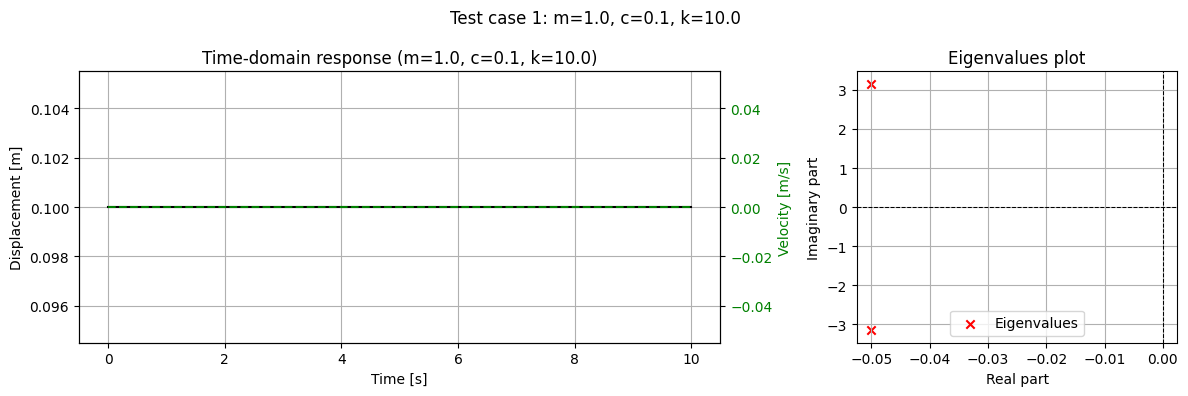

Test case 2 (m=3.0, c=1.0, k=20.0):
Eigenvalues: [-0.16666667+2.57660414j -0.16666667-2.57660414j]
Stability: Stable
Controllability: Controllable


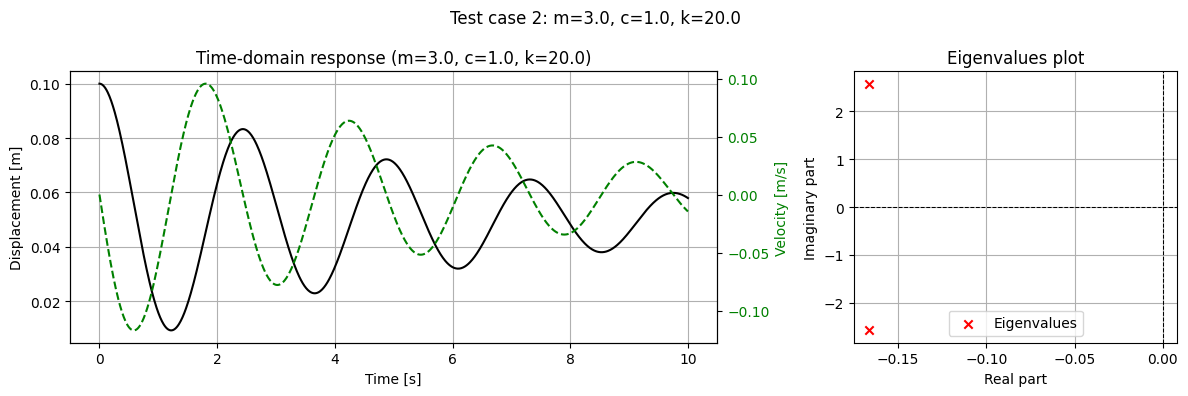

Test case 3 (m=3.0, c=2.0, k=50.0):
Eigenvalues: [-0.33333333+4.06885187j -0.33333333-4.06885187j]
Stability: Stable
Controllability: Controllable


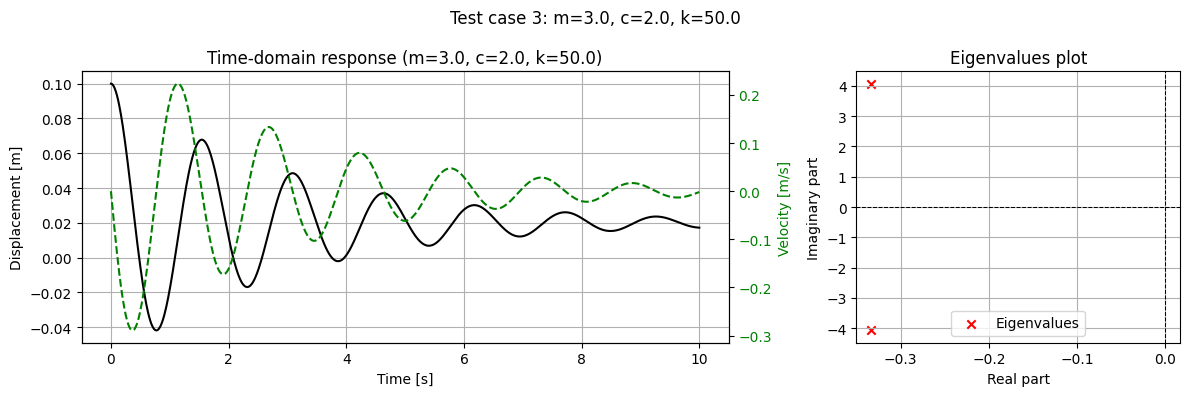

Test case 4 (m=1.0, c=0.1, k=20.0):
Eigenvalues: [-0.05+4.47185644j -0.05-4.47185644j]
Stability: Stable
Controllability: Controllable


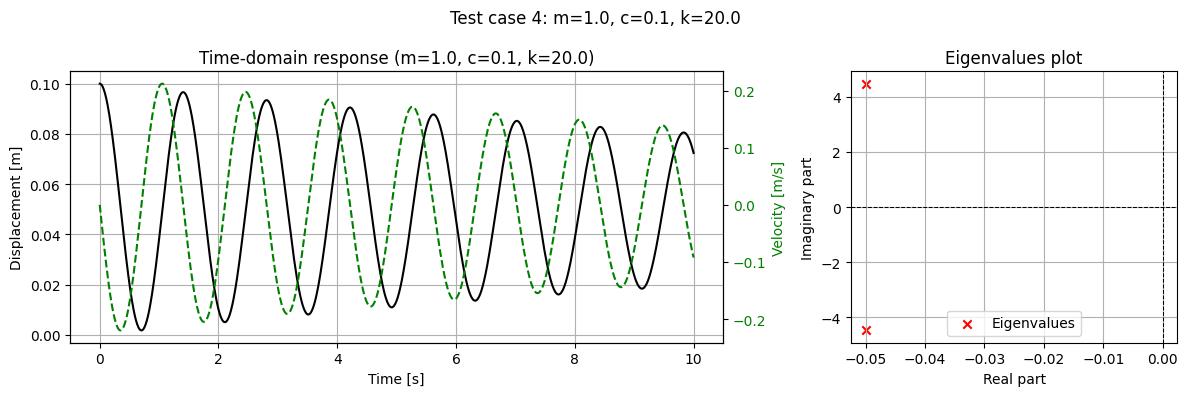

In [7]:
# Test each parameter set
for i, (m, c, k) in enumerate(parameter_sets):
    # Generate state-space matrices
    A, B, C, D = state_space_matrices(m, c, k)

    # Time-domain simulation
    t, response = simulate_system(A, B, step_input, t_span, x0, t_eval)

    # Eigenvalue analysis
    eigenvalues, is_stable = check_stability(A)
    stability_status = "Stable" if is_stable else "Unstable"

    # Check controllability
    controllable = is_controllable(A, B)
    controllability_status = "Controllable" if controllable else "Not controllable"

    print(f"Test case {i + 1} (m={m}, c={c}, k={k}):")
    print(f"Eigenvalues: {eigenvalues}")
    print(f"Stability: {stability_status}")
    print(f"Controllability: {controllability_status}")

    # Combined plot
    plot_results(t, response, eigenvalues, f"Test case {i + 1}: m={m}, c={c}, k={k}")